# Beijing-air quality Data Exploration


In [ ]:
!pip install seaborn
import os
import glob
import numpy as np # linear algebra
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential, optimizers, metrics
import seaborn as sns

     |████████████████████████████████| 293 kB 26.0 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
SEQUENCE_LEN = 5
BATCH_SIZE = 128
PM_25_BOUNDARIES = [35, 75, 150]
NUM_CLASSES = len(PM_25_BOUNDARIES) + 1
NUM_COLS = 16

In [ ]:
# Load the dataset
base_dir = '/datasets/beijing-air/normalised'

In [ ]:
datafiles = glob.glob(base_dir + '/*.csv')
datafiles

['/datasets/beijing-air/normalised/PRSA_Data_Gucheng_20130301-20170228.csv',
 '/datasets/beijing-air/normalised/PRSA_Data_Dongsi_20130301-20170228.csv',
 '/datasets/beijing-air/normalised/PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 '/datasets/beijing-air/normalised/PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 '/datasets/beijing-air/normalised/PRSA_Data_Wanshouxigong_20130301-20170228.csv',
 '/datasets/beijing-air/normalised/PRSA_Data_Wanliu_20130301-20170228.csv',
 '/datasets/beijing-air/normalised/PRSA_Data_Dingling_20130301-20170228.csv',
 '/datasets/beijing-air/normalised/PRSA_Data_Changping_20130301-20170228.csv',
 '/datasets/beijing-air/normalised/PRSA_Data_Tiantan_20130301-20170228.csv',
 '/datasets/beijing-air/normalised/PRSA_Data_Shunyi_20130301-20170228.csv',
 '/datasets/beijing-air/normalised/PRSA_Data_Guanyuan_20130301-20170228.csv',
 '/datasets/beijing-air/normalised/PRSA_Data_Huairou_20130301-20170228.csv']

In [ ]:
dfs = [pd.read_csv(dataset) for dataset in datafiles]

# Concatenate the dataframes into a single dataframe
df = pd.concat(dfs)

In [ ]:
column_names = df.columns.tolist()

In [ ]:
print(column_names)

['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'station', 'day_sin', 'day_cos', 'year_sin', 'year_cos', 'wind_x', 'wind_y']


In [ ]:
# Count number of instances in each class
class_counts = df['PM2.5'].value_counts()

#class counts
print(class_counts)

3.0      7874
10.0     6657
9.0      6479
8.0      6427
11.0     6351
         ... 
707.0       1
12.5        1
114.1       1
38.1        1
78.7        1
Name: PM2.5, Length: 850, dtype: int64


Right so it would seem there are many instances of one class and few instances of another so this would suggest the data is unbalanced. I think these are categorized into 4 classes in the data processing part of the code we are given

In [ ]:
df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,station,day_sin,day_cos,year_sin,year_cos,wind_x,wind_y
0,13.0,-0.870807,-0.170600,-1.299696,-0.112293,0.063893,-1.043179,1.558164,-1.508667,-0.078929,5.0,-0.866025,0.500000,0.861973,0.506955,1.755371,-0.727099
1,15.0,-0.892694,-0.076730,-1.071530,-0.025874,-0.094812,-1.095694,1.653836,-1.436195,-0.078929,5.0,-0.707107,0.707107,0.862336,0.506337,0.267878,-0.646716
2,16.0,-0.837977,0.017140,-0.900405,-0.025874,-0.218249,-1.069437,1.682538,-1.450689,-0.078929,5.0,-0.500000,0.866025,0.862699,0.505719,1.000000,0.000000
3,16.0,-0.837977,-0.076730,-0.871884,-0.112293,-0.235883,-1.165714,1.701672,-1.450689,-0.078929,5.0,-0.258819,0.965926,0.863061,0.505100,1.016267,-0.420952
4,14.0,-0.947410,0.392619,-0.215905,0.146100,-0.570926,-1.209476,1.730374,-1.479678,-0.078929,5.0,-0.000000,1.000000,0.863423,0.504481,1.293431,0.535757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31703,16.0,-0.837977,-0.639949,-0.900405,-0.803646,0.663445,-0.316725,-0.211767,-1.197037,-0.078929,6.0,-0.965926,0.258819,0.853020,0.521879,-1.662983,0.688830
31704,21.0,-0.772316,-0.546079,-0.757801,-0.630808,0.398937,-0.351735,-0.183066,-1.218778,-0.078929,6.0,-0.866025,0.500000,0.853394,0.521267,-0.497488,-1.201043
31705,17.0,-0.783260,-0.639949,-0.329988,-0.285132,0.046259,-0.448012,-0.144797,-1.233273,-0.078929,6.0,-0.707107,0.707107,0.853767,0.520655,1.060660,-1.060660
31706,11.0,-0.827033,-0.593014,-0.529634,0.146964,0.204964,-0.456764,-0.125662,-1.240520,-0.078929,6.0,-0.500000,0.866025,0.854140,0.520043,2.956415,1.224587




Original Attribute Information:

No: row number

year: year of data in this row

month: month of data in this row

day: day of data in this row

hour: hour of data in this row

PM2.5: PM2.5 concentration (ug/m^3)

PM10: PM10 concentration (ug/m^3)

SO2: SO2 concentration (ug/m^3)

NO2: NO2 concentration (ug/m^3)

CO: CO concentration (ug/m^3)

O3: O3 concentration (ug/m^3)

TEMP: temperature (degree Celsius)

PRES: pressure (hPa)

DEWP: dew point temperature (degree Celsius)

RAIN: precipitation (mm)

wd: wind direction

WSPM: wind speed (m/s)

station: name of the air-quality monitoring site


There are around 382,000 rows and 17 columns, there is no year, row number, month, day or hour column a day_sin, day_cos,	year_sin, year_cos column has been added.

In [ ]:
class_counts.head(10)

3.0     7874
10.0    6657
9.0     6479
8.0     6427
11.0    6351
12.0    6273
7.0     5810
13.0    5774
14.0    5670
6.0     5222
Name: PM2.5, dtype: int64

In [ ]:
class_counts.tail(10)

697.0    1
762.0    1
15.7     1
38.6     1
114.6    1
707.0    1
12.5     1
114.1    1
38.1     1
78.7     1
Name: PM2.5, dtype: int64

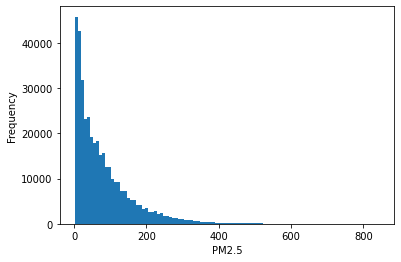

In [ ]:
#histogram of 'PM2.5' column
plt.hist(df['PM2.5'], bins=100)
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.isnull().sum()  # check null values

PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
station     0
day_sin     0
day_cos     0
year_sin    0
year_cos    0
wind_x      0
wind_y      0
dtype: int64

There appears to be no null values in this dataset

In [ ]:
df['PM2.5'].describe()

count    382168.000000
mean         79.432383
std          80.154901
min           2.000000
25%          20.000000
50%          55.000000
75%         111.000000
max         844.000000
Name: PM2.5, dtype: float64

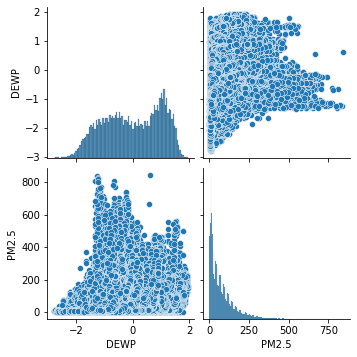

In [ ]:
sns.pairplot(df[['DEWP', 'PM2.5']])

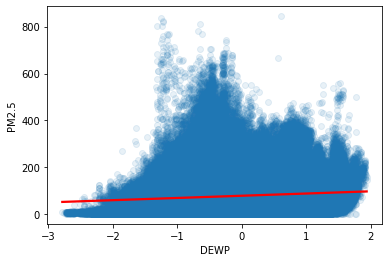

In [ ]:
sns.regplot(x='DEWP', y='PM2.5', data=df, scatter_kws={'alpha':0.1}, line_kws={'color':"red"})
plt.show()

There appears to be quite high levels of PM2.5 at around -2 to -1 DEWP. and a more concentrated PM2.5 at around -1 to 0.

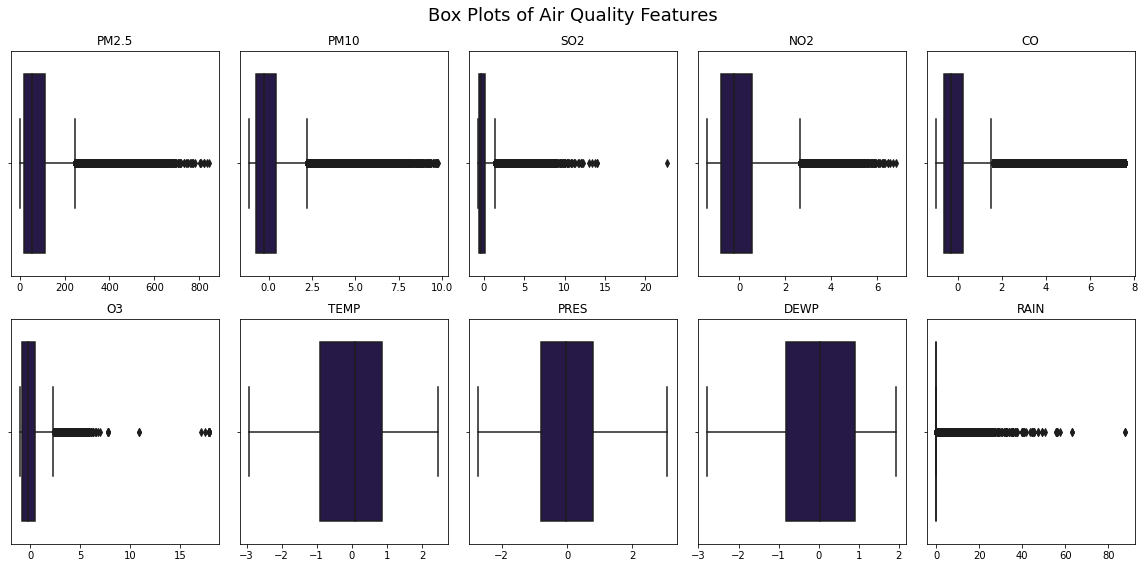

In [ ]:

colors = sns.color_palette("magma")

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(16, 8))
axs = axs.flatten()

for i, feature in enumerate(column_names[:10]):
    sns.boxplot(x=feature, data=df, ax=axs[i], palette=colors)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].set_title(feature)

plt.suptitle('Box Plots of Air Quality Features', fontsize=18)
plt.tight_layout()
plt.show()

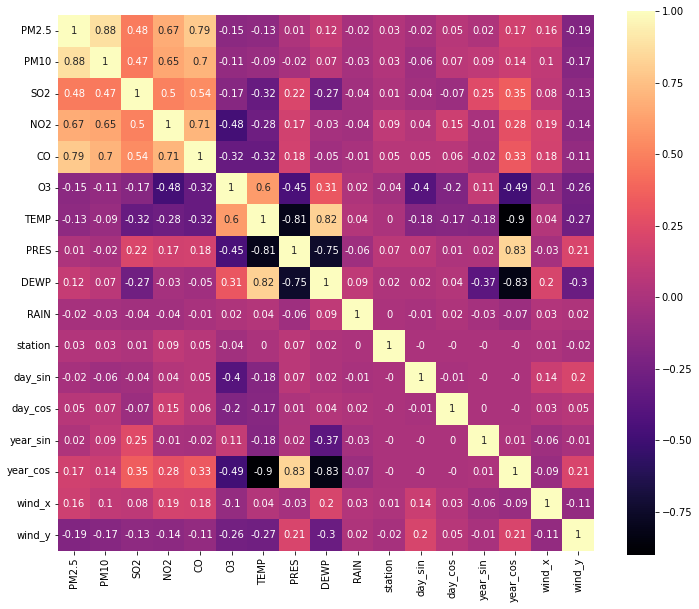

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(round(corr_matrix, 2), annot=True, cmap='magma', square=True)

# Show plot
plt.show()

The lighter colours show a higher correlation so for example pm2.5 and pm10 have the highest correlation of 0.88

CO and pm2.5 - 0.79

NO2 and pm2.5 - 0.67

S02 and pm2.5 - 0.48

some other features have a correlation with each other such as:

PM10 and NO2 - 0.65

PM10 and CO - 0.70

NO2 and CO - 0.71

YEAR_COS and PRES - 0.83

O3 and TEMP - 0.6






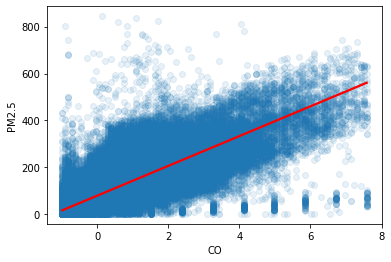

In [ ]:
sns.regplot(x='CO', y='PM2.5', data=df, scatter_kws={'alpha':0.1}, line_kws={'color':"red"})
plt.show()

You can see a very linear trend here between PM2.5 and CO

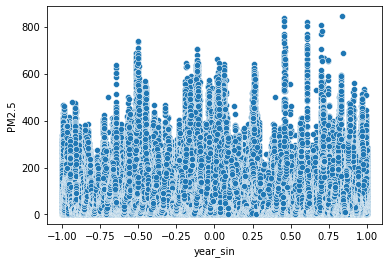

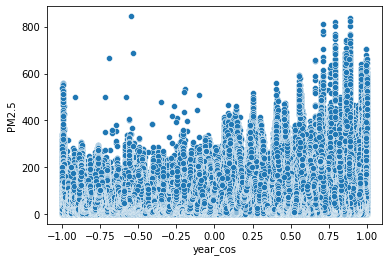

In [ ]:
sns.scatterplot(x='year_sin', y='PM2.5', data=df)
plt.show()

sns.scatterplot(x='year_cos', y='PM2.5', data=df)
plt.show()

There appears to be higher PM2.5 towards the end of the year_cos and year_sin variables, I think the -1.00 to 1.00 represents the time from the first dataset start in 2013 up till the last dataset time 2017

This data suggests 2017 had the most pm2.5

CO and pm2.5 had a high correlation we can check CO and time now as well

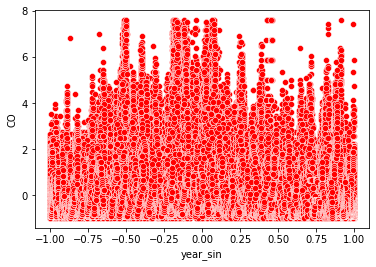

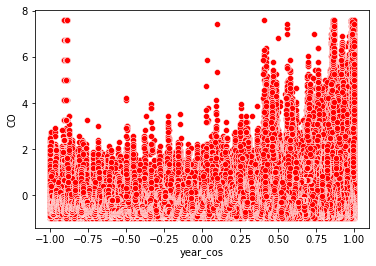

In [ ]:
sns.scatterplot(x='year_sin', y='CO', data=df, color='red')
plt.show()

sns.scatterplot(x='year_cos', y='CO', data=df, color='red')
plt.show()

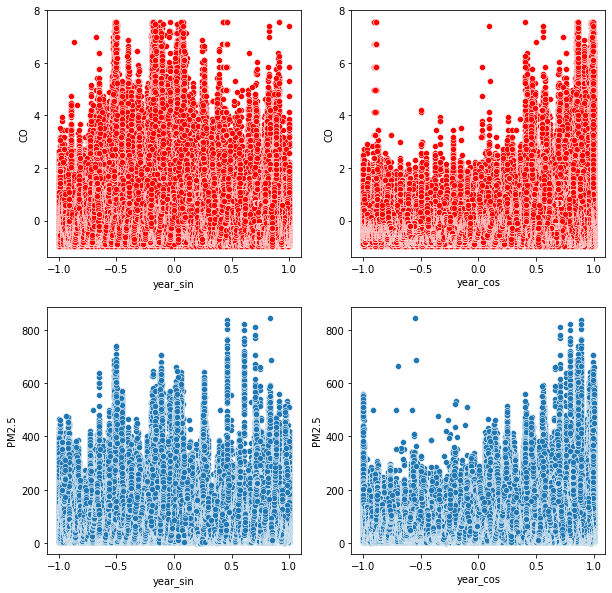

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.scatterplot(x='year_sin', y='CO', data=df, color='red', ax=axs[0, 0])
sns.scatterplot(x='year_cos', y='CO', data=df, color='red', ax=axs[0, 1])
sns.scatterplot(x='year_sin', y='PM2.5', data=df, ax=axs[1, 0])
sns.scatterplot(x='year_cos', y='PM2.5', data=df, ax=axs[1, 1])

plt.show()

It's obvious now there is a big correlation between carbon monoxide and pm2.5 we can see this very well with the year cos plots they look very similar

lets look at something a little less obvious such as wind direction

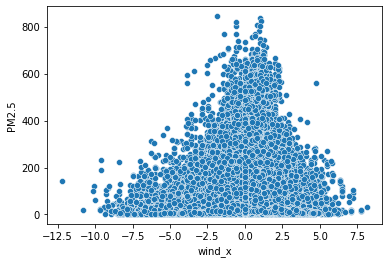

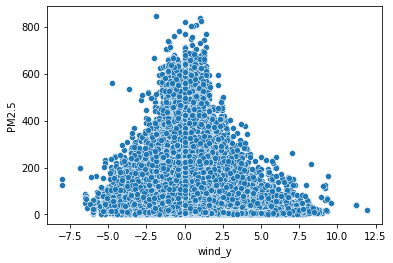

In [ ]:
sns.scatterplot(x='wind_x', y='PM2.5', data=df)
plt.show()

sns.scatterplot(x='wind_y', y='PM2.5', data=df)
plt.show()

In Cautionary tales on air-quality improvement in Beijing it states that lower humidity and temperature regime that is usually associated with the clean, colder and dryer {northerly wind flow}, which removes the PM2.5 in the city.

I think wind Y is north south wind and as that wind gets stronger we see lower PM2.5 levels in the scatter plots above.

The reason I looked at Wind direction and DEW is the paper says these are important confounding factors when it comes to looking at PM2.5

Now lets explore our data once its been processed

# Exploration of processed data

In [ ]:
train_datafiles = datafiles[:8] # 8 csvs
validation_datafiles = datafiles[8:10] # 2 csvs
test_datafiles = datafiles[10:]  # 2 csv's
train_datafiles, test_datafiles, validation_datafiles # all 12 csvs

(['/datasets/beijing-air/normalised/PRSA_Data_Gucheng_20130301-20170228.csv',
  '/datasets/beijing-air/normalised/PRSA_Data_Dongsi_20130301-20170228.csv',
  '/datasets/beijing-air/normalised/PRSA_Data_Aotizhongxin_20130301-20170228.csv',
  '/datasets/beijing-air/normalised/PRSA_Data_Nongzhanguan_20130301-20170228.csv',
  '/datasets/beijing-air/normalised/PRSA_Data_Wanshouxigong_20130301-20170228.csv',
  '/datasets/beijing-air/normalised/PRSA_Data_Wanliu_20130301-20170228.csv',
  '/datasets/beijing-air/normalised/PRSA_Data_Dingling_20130301-20170228.csv',
  '/datasets/beijing-air/normalised/PRSA_Data_Changping_20130301-20170228.csv'],
 ['/datasets/beijing-air/normalised/PRSA_Data_Guanyuan_20130301-20170228.csv',
  '/datasets/beijing-air/normalised/PRSA_Data_Huairou_20130301-20170228.csv'],
 ['/datasets/beijing-air/normalised/PRSA_Data_Tiantan_20130301-20170228.csv',
  '/datasets/beijing-air/normalised/PRSA_Data_Shunyi_20130301-20170228.csv'])

In [ ]:
def load_and_chain_ds(filenames):
    base_ds = tf.data.experimental.make_csv_dataset(
        filenames[0],
        batch_size=BATCH_SIZE,
        label_name='PM2.5',
        shuffle=False, num_epochs=1,
        )
    for f in filenames[1:]:
        d = tf.data.experimental.make_csv_dataset(
            f,
            batch_size=BATCH_SIZE,
            label_name='PM2.5',
            shuffle=False, num_epochs=1,
            )
        base_ds = base_ds.concatenate(d)
    base_ds = base_ds.cache()
    base_ds = base_ds.prefetch(tf.data.AUTOTUNE)
    return base_ds

In [ ]:
train_ds = load_and_chain_ds(train_datafiles)
validation_ds = load_and_chain_ds(validation_datafiles)
test_ds = load_and_chain_ds(test_datafiles)

test_ds

<PrefetchDataset element_spec=(OrderedDict([('PM10', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('SO2', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('NO2', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('CO', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('O3', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('TEMP', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('PRES', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('DEWP', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('RAIN', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('station', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('day_sin', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('day_cos', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('year_sin', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('year_cos', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('wind_x', TensorSpec

# Massage input

In [ ]:
pm25_categories = Discretization(bin_boundaries=PM_25_BOUNDARIES, output_mode='one_hot')

@tf.function
def merge_cols(x):
    inputs = tf.convert_to_tensor(list(x.values()))
    return tf.transpose(inputs)

In [ ]:
train_ds = train_ds.map(lambda x, y: (
    merge_cols(x), pm25_categories(y)))

validation_ds = validation_ds.map(lambda x, y: (
    merge_cols(x), pm25_categories(y)))

test_ds = test_ds.map(lambda x, y: (
    merge_cols(x), pm25_categories(y)))

test_ds

<MapDataset element_spec=(TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [ ]:
def windowify(dataset, window_size=SEQUENCE_LEN, batch_size=BATCH_SIZE):
    fds = dataset.unbatch().window(window_size, shift=1)
    fds_x = fds.flat_map(
        lambda x, y: x.batch(window_size, drop_remainder=True))
    fds_y = fds.flat_map(
        lambda x, y: y.batch(window_size, drop_remainder=True))
    fds_y = fds_y.map(lambda y: y[-1, :])
    fds = tf.data.Dataset.zip((fds_x, fds_y))
    fds = fds.shuffle(1000)
    fds = fds.cache()
    fds = fds.batch(batch_size)
    return fds

In [ ]:
train_ds = windowify(train_ds)
validation_ds = windowify(validation_ds)
test_ds = windowify(test_ds)
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 5, 16), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

# Processed Data Exploration

In [ ]:
NUM_CLASSES

4

So we have four classes

In [ ]:
class_counts = np.zeros(NUM_CLASSES)

for x, y in train_ds:
    y = tf.argmax(y, axis=1)
    class_counts += np.bincount(y, minlength=NUM_CLASSES)

print(class_counts)

[93774. 60677. 61338. 39367.]


In [ ]:
print('First class of <35 has', int(class_counts[0]), 'values')
print('Second class of 36-75 has', int(class_counts[1]), 'values')
print('Third class of 76-150 has', int(class_counts[2]), 'values')
print('Fourth class of >150 has', int(class_counts[3]), 'values')

First class of <35 has 93774 values
Second class of 36-75 has 60677 values
Third class of 76-150 has 61338 values
Fourth class of >150 has 39367 values


This suggests that our classes are unbalanced as one class has around 93,000 values and the lowest has around 39,000

There are some ways we can address this problem such as: undersampling, oversampling, weighted data, and SMOTE

In [ ]:
size = sum(class_counts)
print(size)

255156.0


This shows us that the Fourth class of >150 has 39367 values has the most weight and that the First class of <35 has 93774 values has the lowest weight. What we can do is add weight to the lowest class. The problem with this is that we want higher PM2.5 levels to have a higher weight because pm2.5 is what were trying to predict.

What I could do instead though is when it comes to evaluating the models is use methods like ROC/AUC, Gini coefficient as they perform better in evaluating the model performance when there is class disparity.

I could also use data augmentation as this may add data to the minority classes